<a href="https://colab.research.google.com/github/krakowiakpawel9/convnet-course/blob/master/models/03_keras_functional_model_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

## Simple Multilayer Perceptron - Functional Model

In [0]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense

visible = Input(shape=(10,))
hidden_1 = Dense(units=10, activation='relu')(visible)
hidden_2 = Dense(units=20, activation='relu')(hidden_1)
hidden_3 = Dense(units=10, activation='relu')(hidden_2)
output = Dense(units=1, activation='sigmoid')(hidden_3)
model = Model(inputs=visible, outputs=output)

print(model.summary())

Using TensorFlow backend.
W0711 12:20:34.633659 140001778968448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 12:20:34.651129 140001778968448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 12:20:34.656300 140001778968448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None


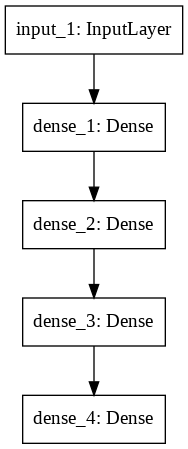

In [0]:
from IPython.display import Image

plot_model(model, to_file='mlp_graph.png')
Image('mlp_graph.png')



---


## Convolutional Neural Network

In [0]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

visible = Input(shape=(64, 64, 1))
conv_1 = Conv2D(filters=32, kernel_size=(4, 4), activation='relu')(visible)
pool_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(filters=16, kernel_size=(4, 4), activation='relu')(pool_1)
pool_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
flat = Flatten()(pool_2)
hidden_1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden_1)
model = Model(inputs=visible, outputs=output)

model.summary()

W0711 12:25:45.022823 140001778968448 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                27050     
__________

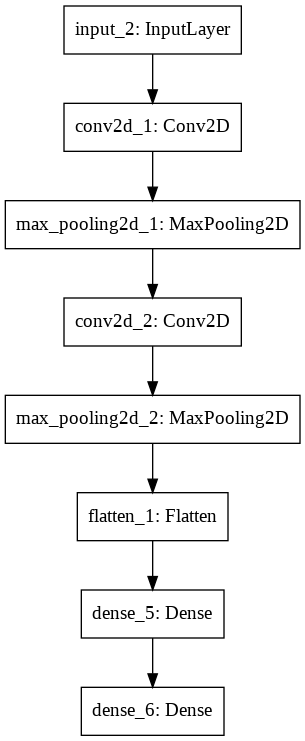

In [0]:
from IPython.display import Image

plot_model(model, to_file='cnn.png')
Image('mlp_graph.png')

### Shared Input Layer

Zastosujemy dwa różne 'podmodele' do ekstrakcji cech, które zasilają się tymi samymi danymi wejściowymi

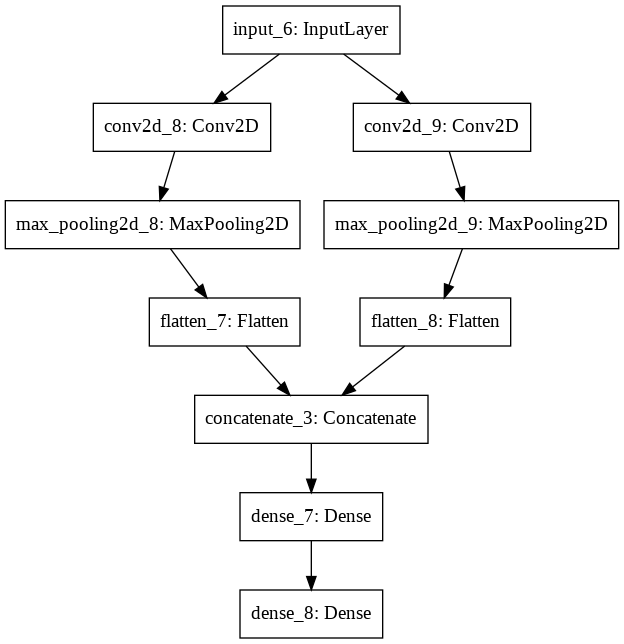

In [0]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

visible = Input(shape=(64, 64, 1))

# pierwsza odnoga ekstrakcji cech
conv_1 = Conv2D(filters=32, kernel_size=(4, 4), activation='relu')(visible)
pool_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
flat_1 = Flatten()(pool_1)

# druga odnoga ekstrakcji cech
conv_2 = Conv2D(filters=16, kernel_size=(8, 8), activation='relu')(visible)
pool_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
flat_2 = Flatten()(pool_2)

# połączenie warstw
merge = concatenate([flat_1, flat_2])

# połączenie siecią gęstą
hidden_1 = Dense(units=10, activation='relu')(merge)
output = Dense(units=1, activation='sigmoid')(hidden_1)


model = Model(inputs=visible, outputs=output)
plot_model(model)

plot_model(model, to_file='SIL.png')
Image('SIL.png')